<a href="https://colab.research.google.com/github/edhillon7/Computer_Vision-/blob/main/Connected_Componenet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
h, w = 360, 640
img = np.zeros((h, w), dtype=np.uint8)

# Draw shapes (these become separate components after thresholding)
cv2.rectangle(img, (40, 40), (180, 160), 200, -1)    # light rectangle
cv2.circle(img, (320, 120), 60, 255, -1)             # bright circle
cv2.ellipse(img, (520, 240), (70, 40), 0, 0, 360, 180, -1)
cv2.putText(img, 'CCA', (60, 280), cv2.FONT_HERSHEY_SIMPLEX, 2.0, 220, 5, cv2.LINE_AA)

# Add a few small noise blobs to show small components
np.random.seed(1)
for _ in range(12):
    cx = np.random.randint(10, w-10)
    cy = np.random.randint(10, h-10)
    rr = np.random.randint(3, 8)
    cv2.circle(img, (cx, cy), rr, 255, -1)

In [16]:
thresh_val = 127
_, binary = cv2.threshold(img, thresh_val, 255, cv2.THRESH_BINARY)

# Ensure binary is 0/1 or 0/255 as required by connectedComponentsWithStats
binary_for_cc = (binary > 0).astype(np.uint8) * 255

In [17]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_for_cc, connectivity=8)

print(f"Number of connected components (including background): {num_labels}")
# stats rows: [label, x, y, width, height, area]  (background is label 0)

Number of connected components (including background): 3


In [26]:
np.random.seed(2)
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)
colors[0] = [0, 0, 0]  # background -> black

# --- vectorized color mapping (safe & fast) ---
labels = labels.astype(np.int32)         # ensure ints
colored = colors[labels]                 # shape (h, w, 3)
colored = colored.astype(np.uint8)

# Draw bounding boxes and centroids on a copy
overlay = colored.copy()
for lbl in range(1, num_labels):
    x, y, width, height, area = stats[lbl]
    cx, cy = centroids[lbl]
    # Optional: skip tiny components
    # if area < 20: continue
    cv2.rectangle(overlay, (x, y), (x + width, y + height), (255, 255, 255), 2)
    cv2.putText(overlay, str(lbl), (int(cx) - 10, int(cy) + 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)


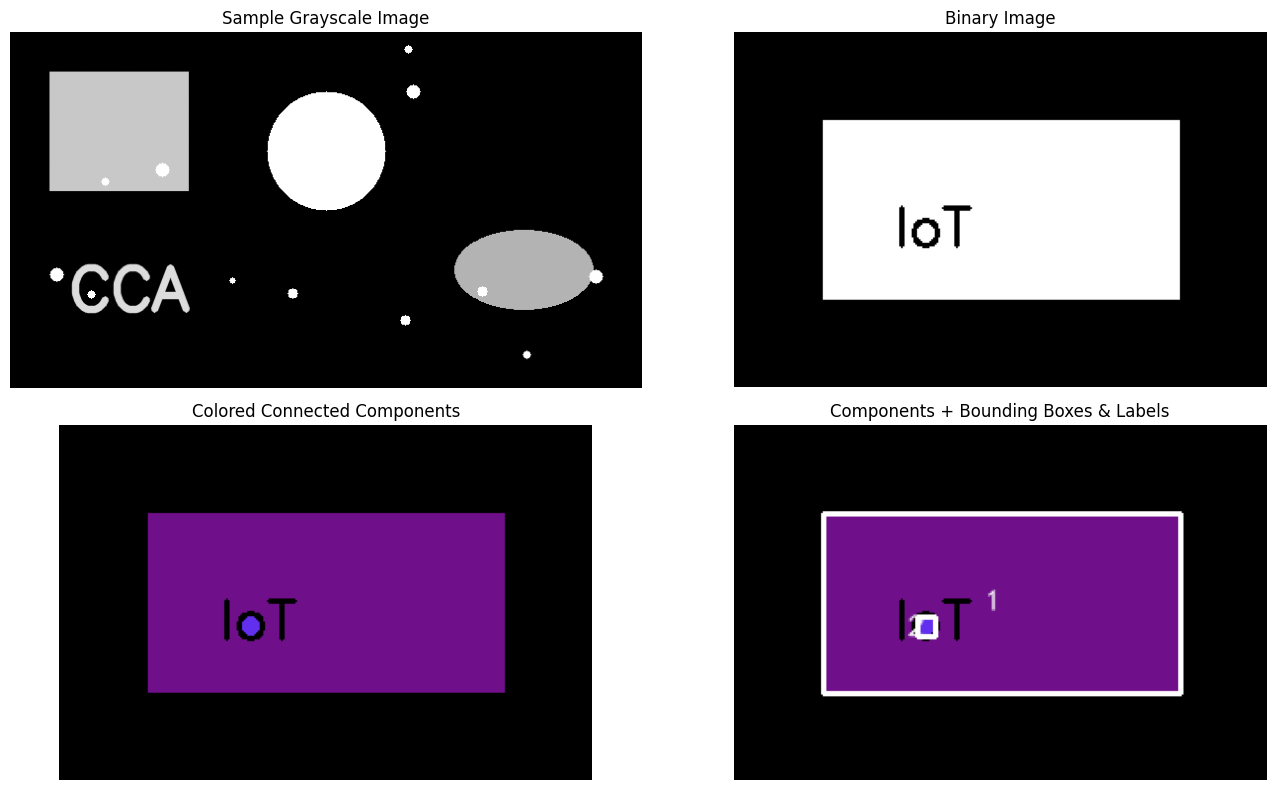

In [27]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.title("Sample Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Binary Image")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Colored Connected Components")
plt.imshow(colored)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Components + Bounding Boxes & Labels")
plt.imshow(overlay)
plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
print("\nComponent details (excluding background):")
for i in range(1, num_labels):
    x, y, width, height, area = stats[i]
    cx, cy = centroids[i]
    print(f"  Component {i:2d}: Area={area:4d} | Centroid=({cx:.1f}, {cy:.1f}) | BBox=({x},{y},{width},{height})")


Component details (excluding background):
  Component  1: Area=19909 | Centroid=(150.8, 99.8) | BBox=(50,50,201,101)
  Component  2: Area=  86 | Centroid=(107.5, 113.0) | BBox=(103,108,10,11)


In [29]:
# Convert RGB (matplotlib) ordering to BGR for OpenCV saving
output_bgr = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)
out_fname = "connected_components_output.jpg"
cv2.imwrite(out_fname, output_bgr)
print(f"\n✅ Result image saved as '{out_fname}'")


✅ Result image saved as 'connected_components_output.jpg'
